# Importing the Required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [2]:
df=pd.read_csv(r"C:\Users\Tusha\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.shape

(1470, 35)

In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
categorical=[] # Empty List to store the categorical column name 
continous=[] # Empty List to store the numerical/continuous column name 
for col in df.columns:
    if df[col].nunique()<=30: # if the column have unique value less than 30 than it is categorical column 
        categorical.append(col)
    else:
        continous.append(col) # Else it is a numerical column 
categorical=df.loc[:, categorical]
continous=df.loc[:, continous]
print(categorical.columns)
print(continous.columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Age', 'DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')


# Oulier Analysis and Treatement

In [5]:
for i in continous.columns:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    mean=df[i].mean()
    ind_lo=df[df[i]<lf].index
    for k in ind_lo:
        df.loc[k, i]=mean
    ind_uo=df[df[i]>uf].index
    for j in ind_uo:
        df.loc[j, i]=mean

In [6]:
# Business travel, department and Gender wise attrition count
df.groupby(['BusinessTravel','Department', 'Gender'])['Attrition'].count()

BusinessTravel     Department              Gender
Non-Travel         Human Resources         Female      2
                                           Male        4
                   Research & Development  Female     28
                                           Male       69
                   Sales                   Female     19
                                           Male       28
Travel_Frequently  Human Resources         Female      4
                                           Male        7
                   Research & Development  Female     75
                                           Male      107
                   Sales                   Female     38
                                           Male       46
Travel_Rarely      Human Resources         Female     14
                                           Male       32
                   Research & Development  Female    276
                                           Male      406
                   Sales              

# Univariate Analysis

Categorical Columns

No     1233
Yes     237
Name: Attrition, dtype: int64


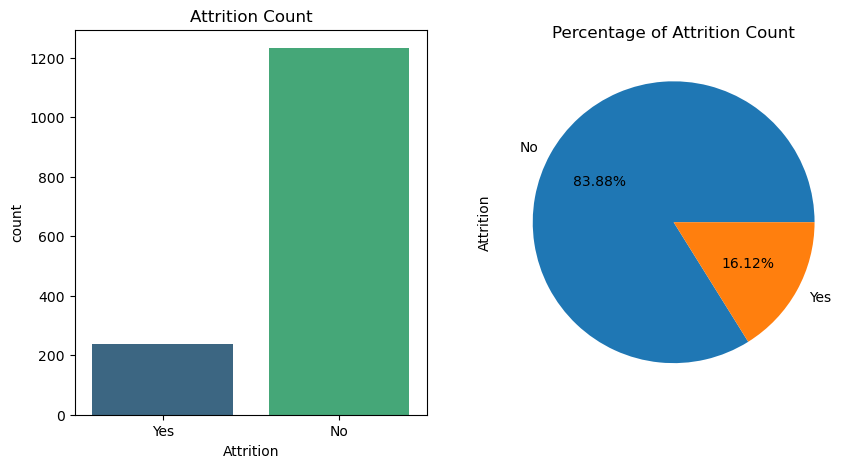

In [69]:
print(df["Attrition"].value_counts())
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["Attrition"],data=categorical,palette='viridis', ax=ax[0])
ax[0].set_title("Attrition Count")
categorical['Attrition'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
ax[1].set_title("Percentage of Attrition Count")
plt.show()

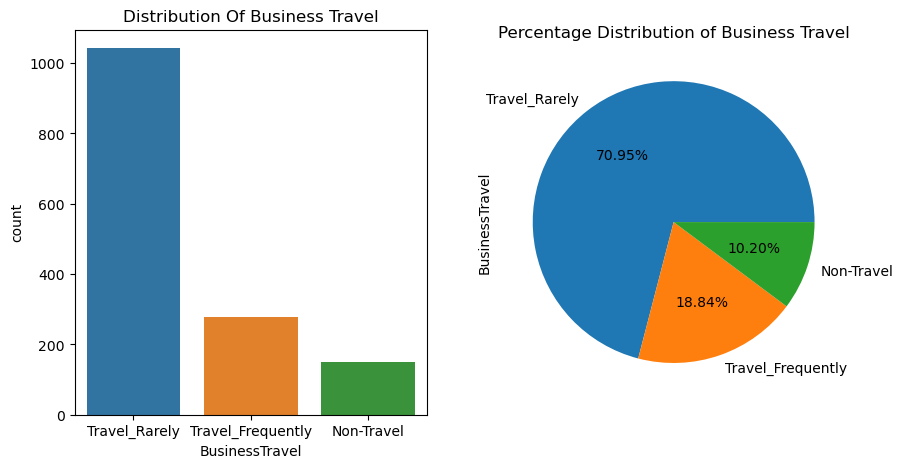

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sb.countplot(data=df, x=df["BusinessTravel"], ax=ax[0])
ax[0].set_title('Distribution Of Business Travel')
ax[1].set_title("Percentage Distribution of Business Travel")
df['BusinessTravel'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

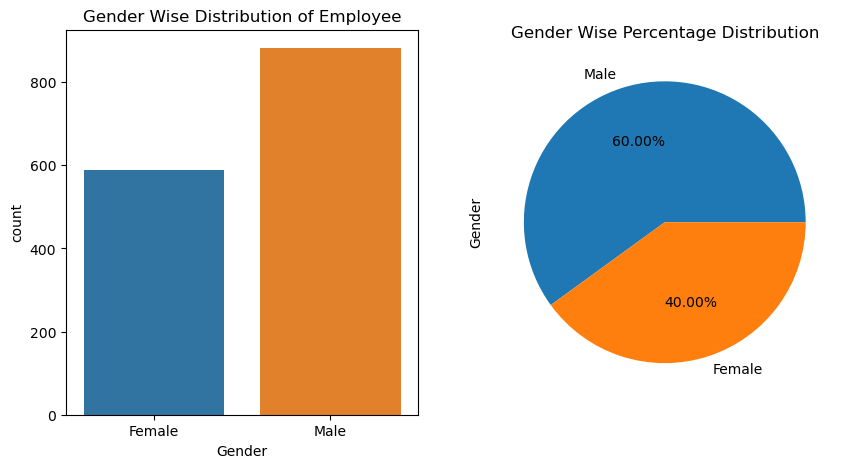

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sb.countplot(data=df, x='Gender', ax=ax[0])
ax[0].set_title("Gender Wise Distribution of Employee")
ax[1].set_title("Gender Wise Percentage Distribution")
df['Gender'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

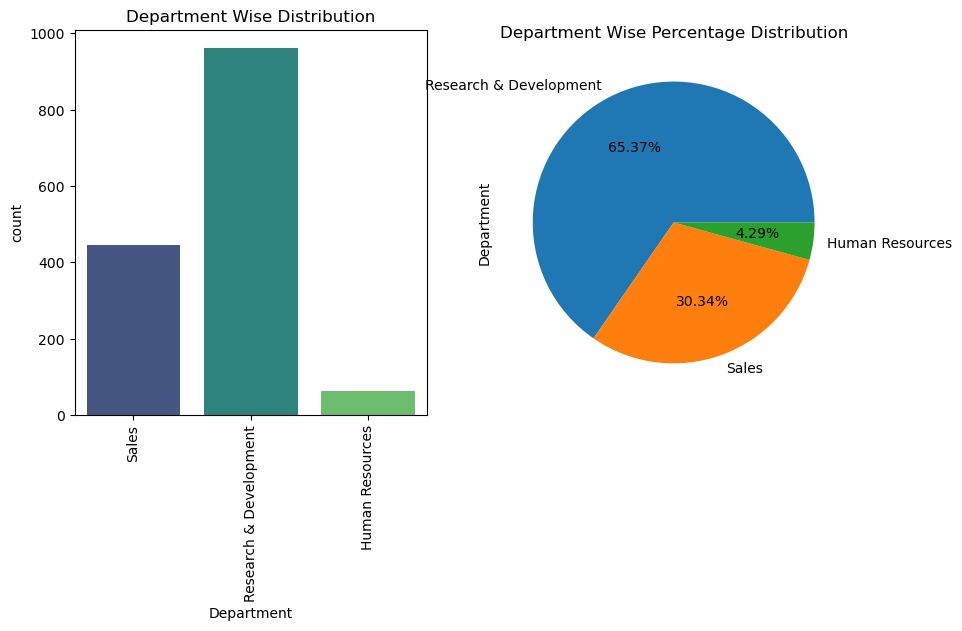

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["Department"],data=categorical, palette='viridis', ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title("Department Wise Percentage Distribution")
ax[0].set_title("Department Wise Distribution")
categorical['Department'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

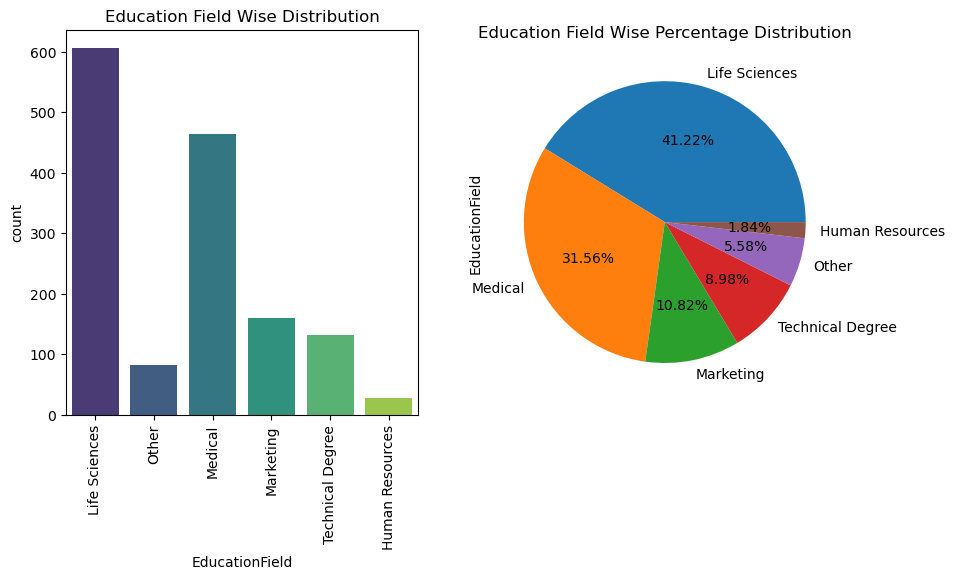

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["EducationField"],data=categorical, palette='viridis', ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title("Education Field Wise Percentage Distribution")
ax[0].set_title("Education Field Wise Distribution")
categorical['EducationField'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

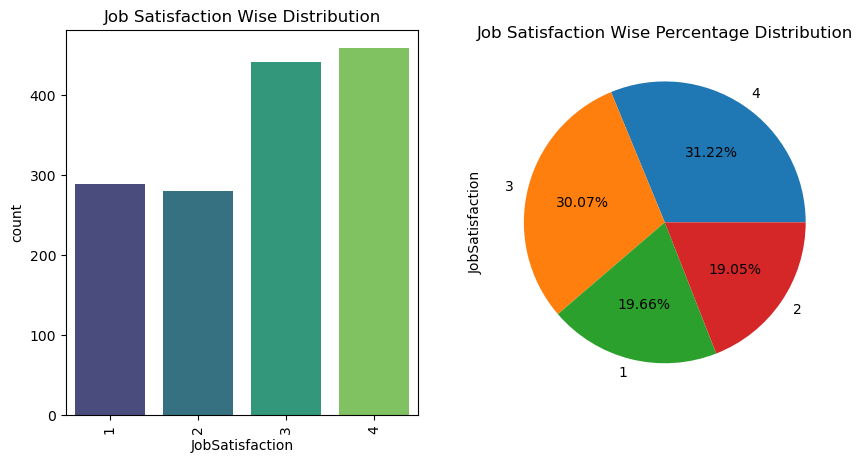

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["JobSatisfaction"],data=categorical,palette='viridis', ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title("Job Satisfaction Wise Percentage Distribution")
ax[0].set_title("Job Satisfaction Wise Distribution")
categorical['JobSatisfaction'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

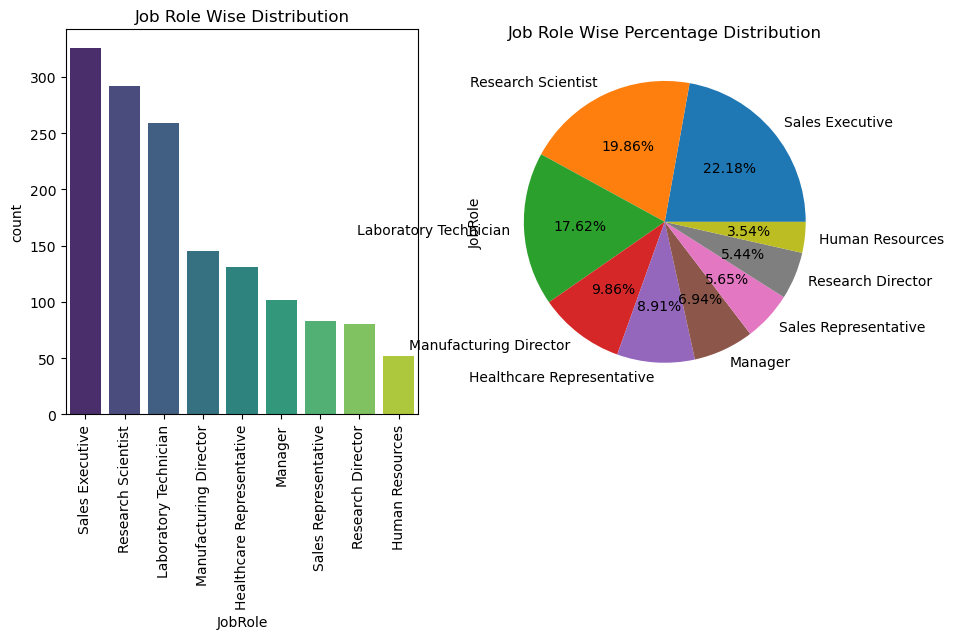

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(data=df, x='JobRole', palette='viridis', ax=ax[0])
ax[1].set_title("Job Role Wise Percentage Distribution")
ax[0].set_title("Job Role Wise Distribution")
a.set_xticklabels(a.get_xticklabels(), rotation=90)
categorical['JobRole'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

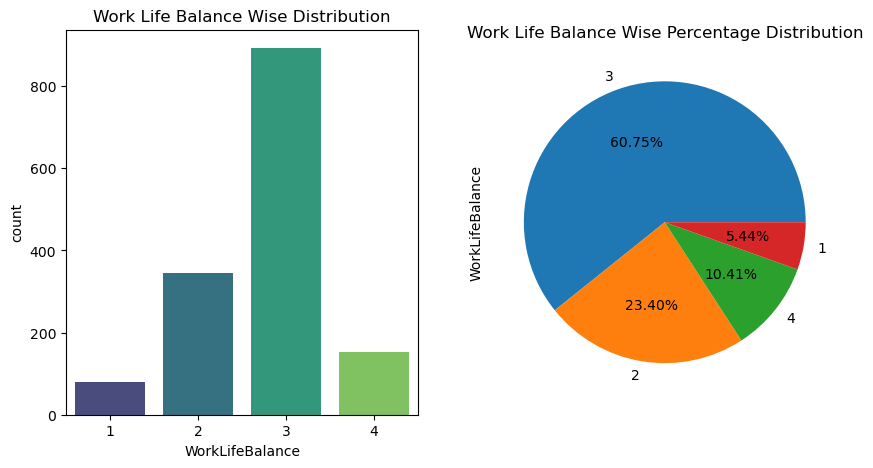

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["WorkLifeBalance"],data=categorical,palette='viridis', ax=ax[0])
ax[1].set_title("Work Life Balance Wise Percentage Distribution")
ax[0].set_title("Work Life Balance Wise Distribution")
categorical['WorkLifeBalance'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

WorkLifeBalance: 1 'Bad'2 'Good'3 'Better'4 'Best'
Interpretation: Most of the employees have the satisfactory work life balance. The 5.44% Employee who rated 1 for the work life balance they likely to quit the job. 

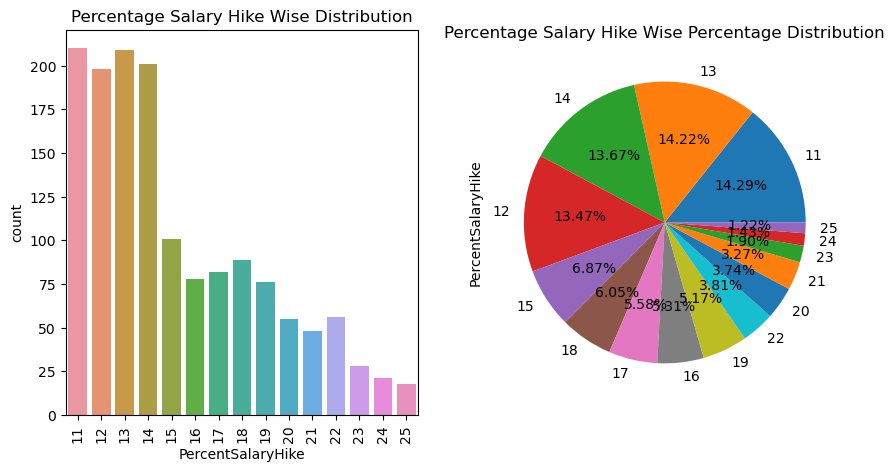

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["PercentSalaryHike"],data=categorical, ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title("Percentage Salary Hike Wise Percentage Distribution")
ax[0].set_title("Percentage Salary Hike Wise Distribution")
categorical['PercentSalaryHike'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

Interpretation: Most of the People have the 11 to 14 Percente Salary Hike per year which is the satisfactory. 

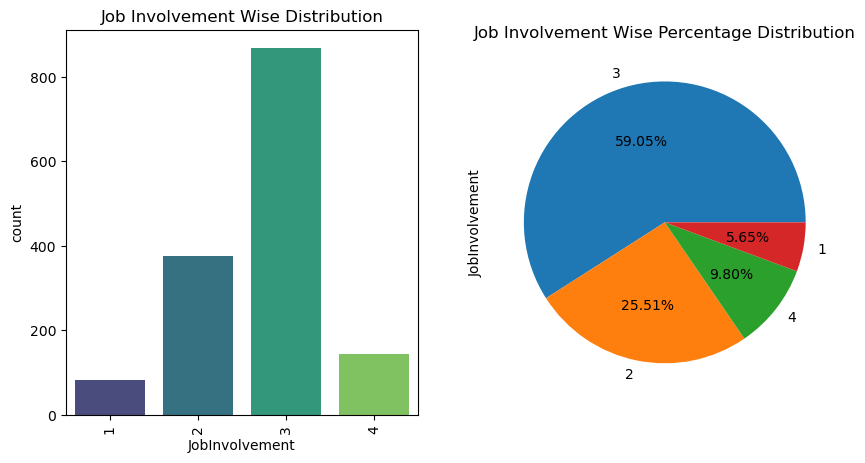

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
a=sb.countplot(x=categorical["JobInvolvement"],data=categorical,palette='viridis', ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title("Job Involvement Wise Percentage Distribution")
ax[0].set_title("Job Involvement Wise Distribution")
categorical['JobInvolvement'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

# Univariate Analysis for Numerical column

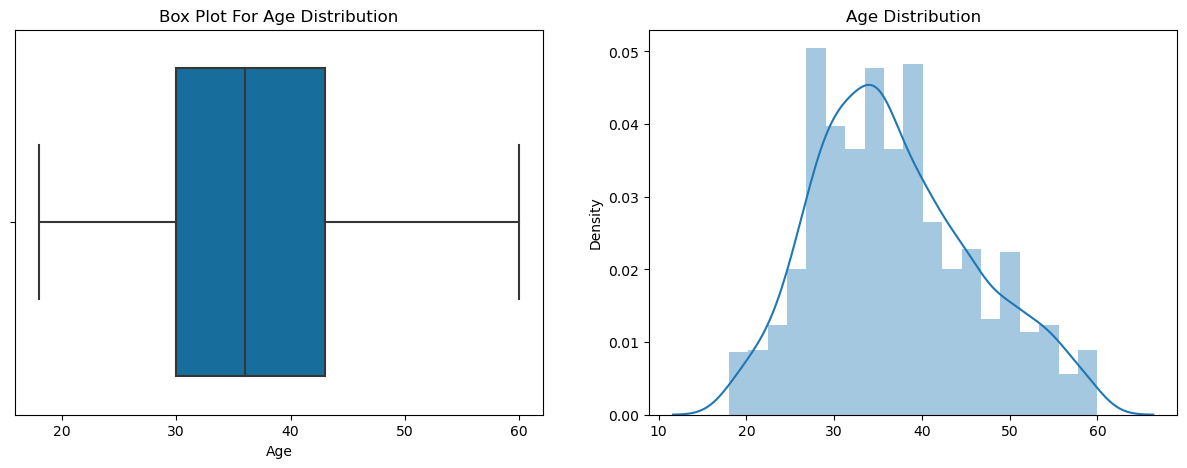

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=df["Age"], palette="colorblind", ax=ax[0])
sb.distplot(x=df["Age"], ax=ax[1], kde=True, hist=True)
ax[0].set_title("Box Plot For Age Distribution")
ax[1].set_title("Age Distribution")
plt.show()

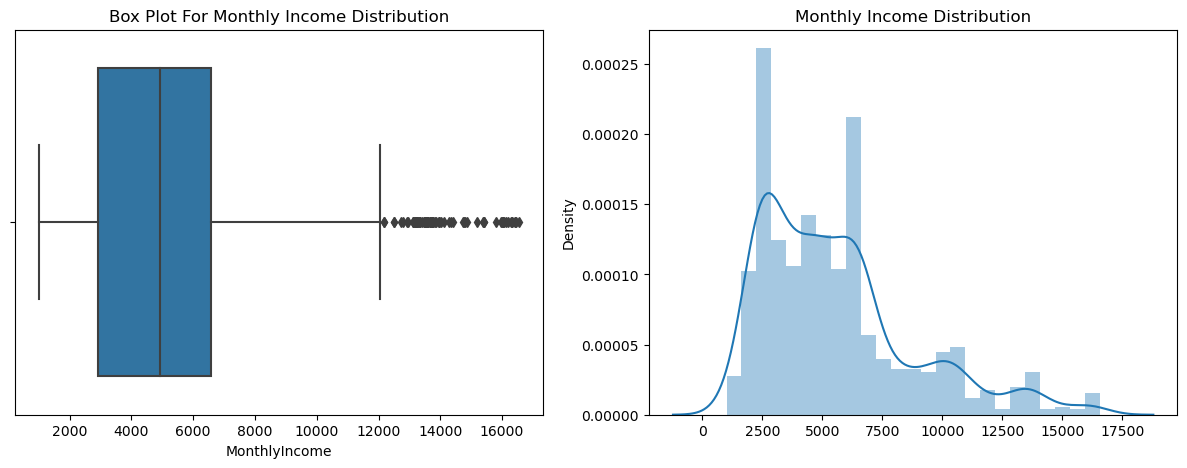

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=df["MonthlyIncome"], ax=ax[0])
sb.distplot(x=df["MonthlyIncome"], ax=ax[1], kde=True, hist=True)
ax[0].set_title("Box Plot For Monthly Income Distribution")
ax[1].set_title("Monthly Income Distribution")
plt.show()

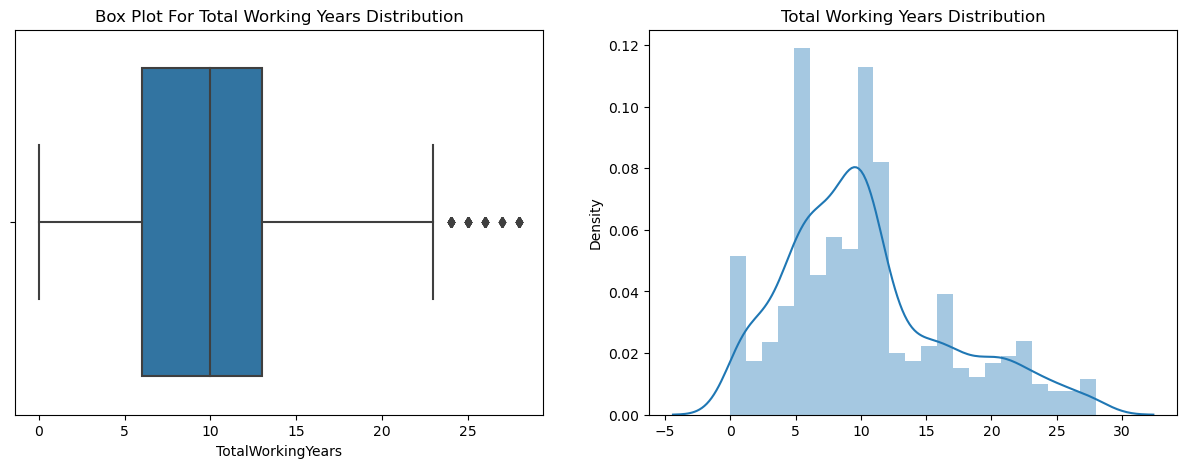

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=df["TotalWorkingYears"], ax=ax[0])
sb.distplot(x=df["TotalWorkingYears"], ax=ax[1], kde=True, hist=True)
ax[0].set_title("Box Plot For Total Working Years Distribution")
ax[1].set_title("Total Working Years Distribution")
plt.show()

# Bivariate & Multivariate Analysis: 
1. Categorical - Categorical Analysis


Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


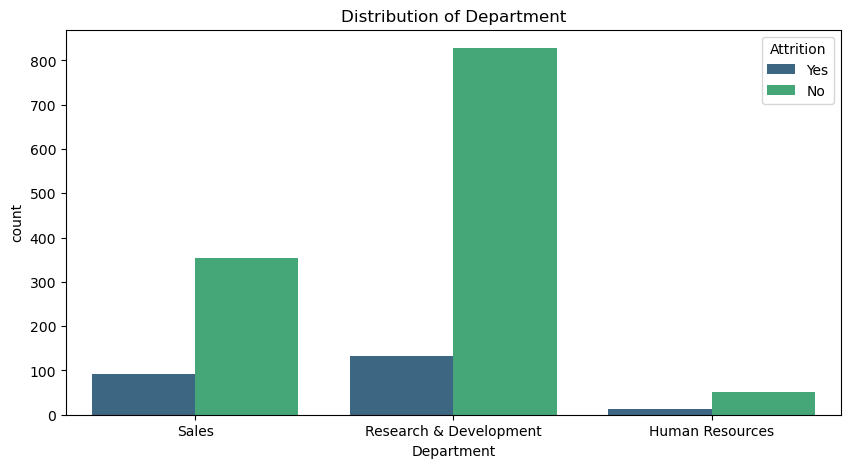

In [29]:
df1=pd.crosstab(index=df["Department"], columns=df["Attrition"])
print(df1)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["Department"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Department")
plt.show()


Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


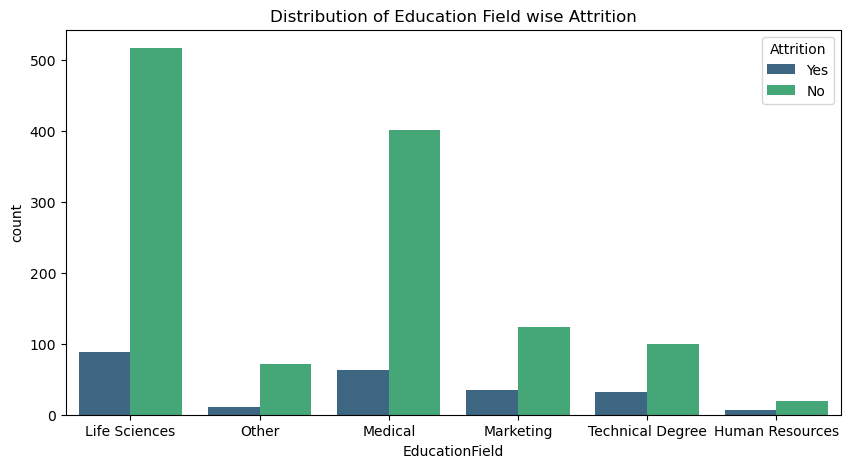

In [30]:
df2=pd.crosstab(index=df["EducationField"], columns=df["Attrition"])
print(df2)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["EducationField"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Education Field wise Attrition")
plt.show()

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156


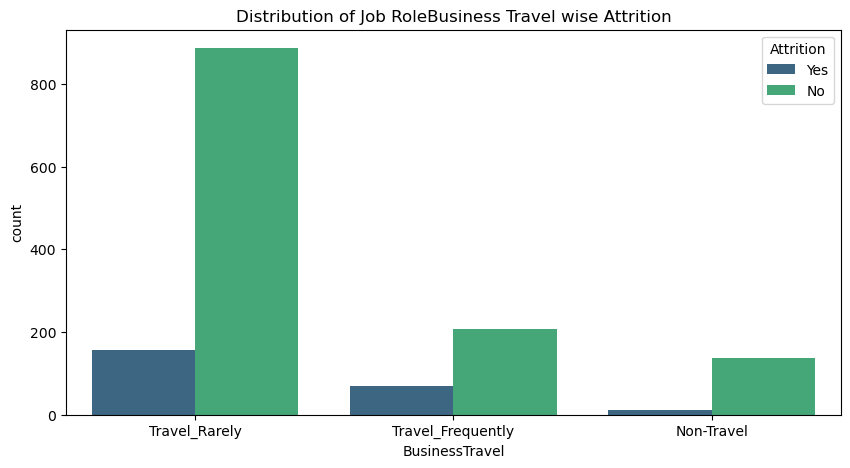

In [32]:
df3=pd.crosstab(index=df["BusinessTravel"], columns=df["Attrition"])
print(df3)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["BusinessTravel"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Job RoleBusiness Travel wise Attrition")
plt.show()

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


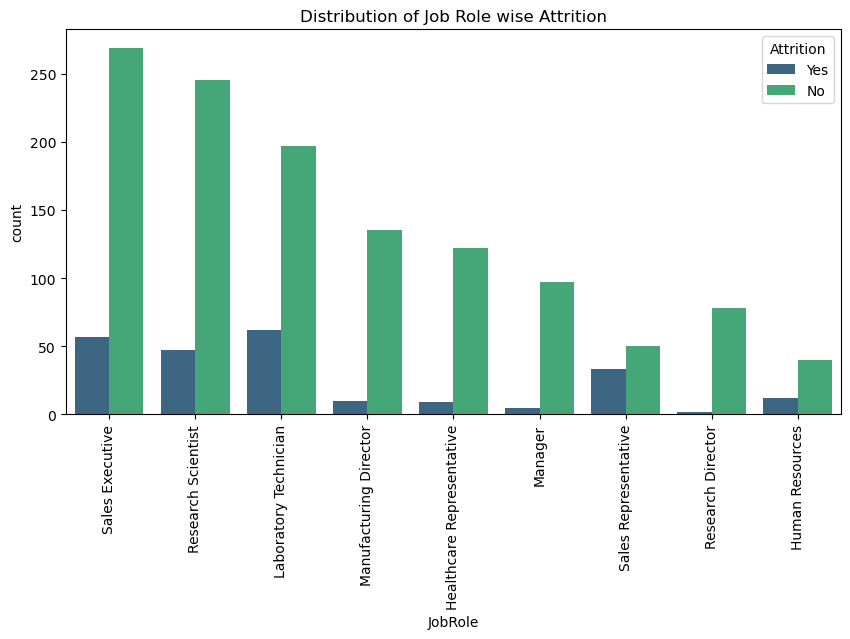

In [34]:
df4=pd.crosstab(index=df["JobRole"], columns=df["Attrition"])
print(df4)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["JobRole"],data=categorical,hue=df["Attrition"], palette='viridis')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title("Distribution of Job Role wise Attrition")
plt.show()

Attrition         No  Yes
JobSatisfaction          
1                223   66
2                234   46
3                369   73
4                407   52


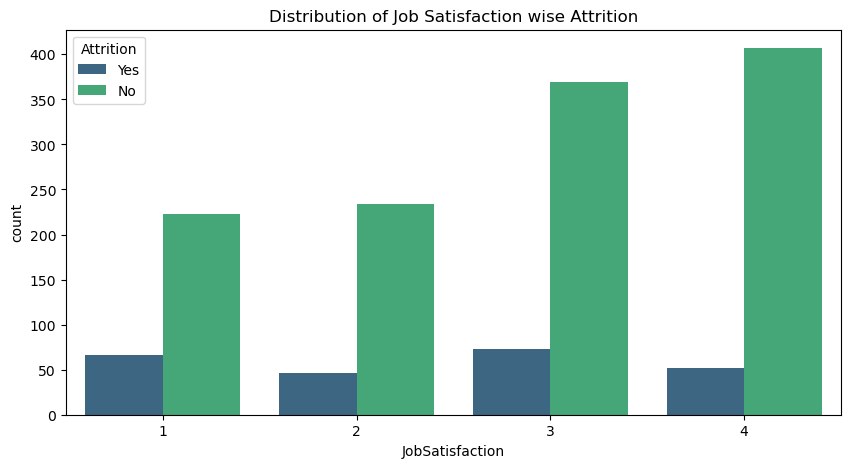

In [35]:
df5=pd.crosstab(index=df["JobSatisfaction"], columns=df["Attrition"])
print(df5)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["JobSatisfaction"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Job Satisfaction wise Attrition")
plt.show()

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150


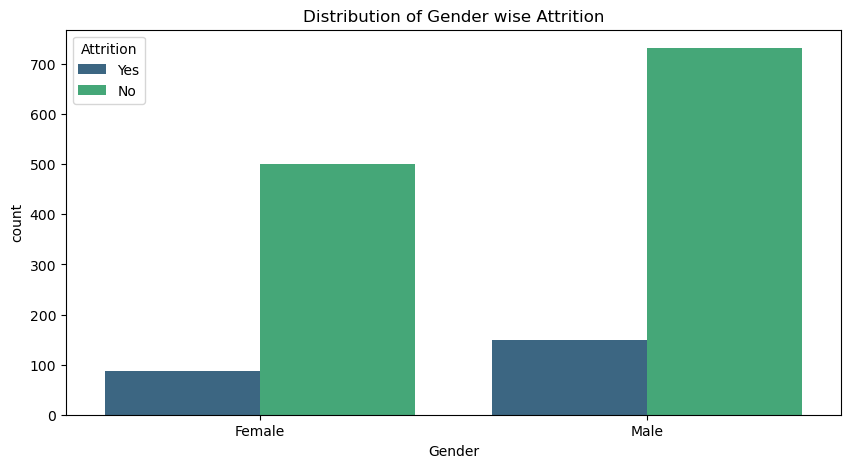

In [36]:
df6=pd.crosstab(index=df["Gender"], columns=df["Attrition"])
print(df6)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["Gender"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Gender wise Attrition")
plt.show()

Attrition            No  Yes
NumCompaniesWorked          
0                   174   23
1                   423   98
2                   130   16
3                   143   16
4                   122   17
5                    47   16
6                    54   16
7                    57   17
8                    43    6
9                    40   12


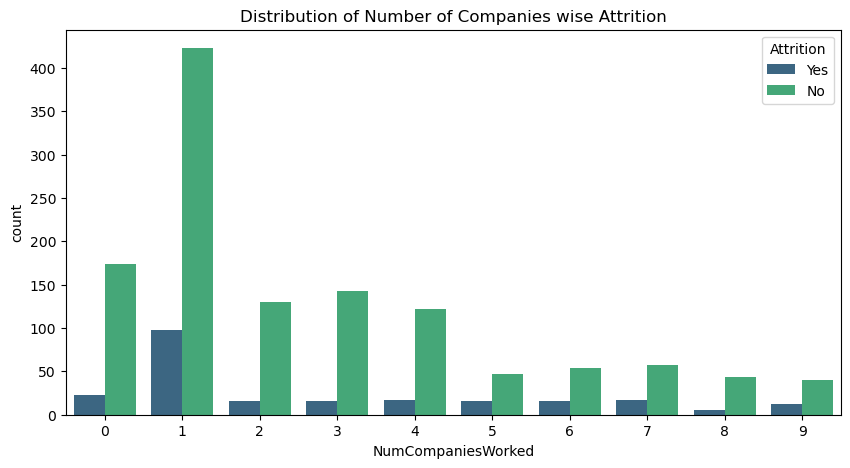

In [37]:
df7=pd.crosstab(index=df["NumCompaniesWorked"], columns=df["Attrition"])
print(df7)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["NumCompaniesWorked"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Number of Companies wise Attrition")
plt.show()

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


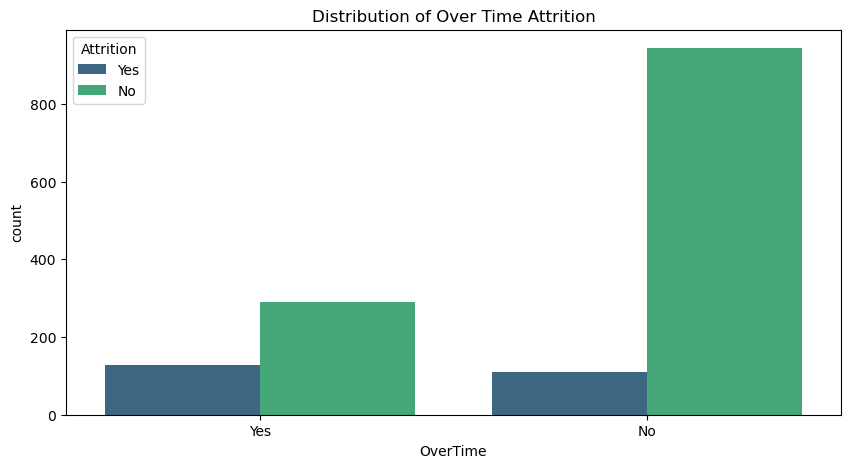

In [38]:
df8=pd.crosstab(index=df["OverTime"], columns=df["Attrition"])
print(df8)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["OverTime"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Over Time Attrition")
plt.show()

Attrition         No  Yes
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27


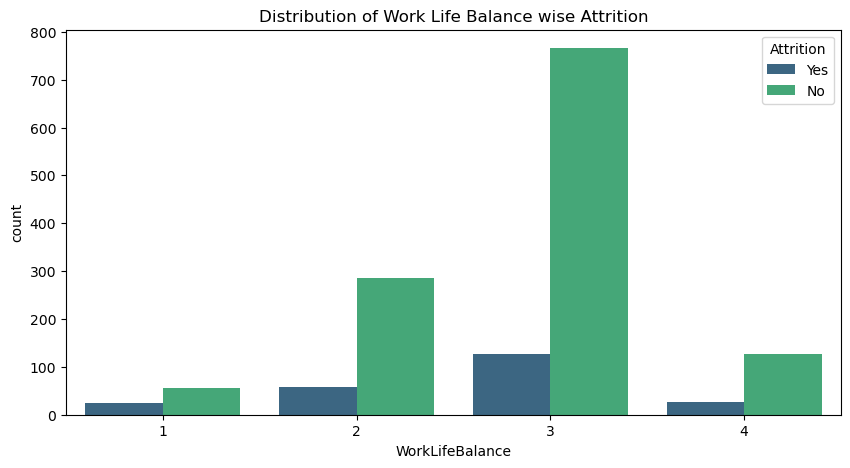

In [39]:
df9=pd.crosstab(index=df["WorkLifeBalance"], columns=df["Attrition"])
print(df9)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["WorkLifeBalance"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Work Life Balance wise Attrition")
plt.show()

Attrition                 No  Yes
EnvironmentSatisfaction          
1                        212   72
2                        244   43
3                        391   62
4                        386   60


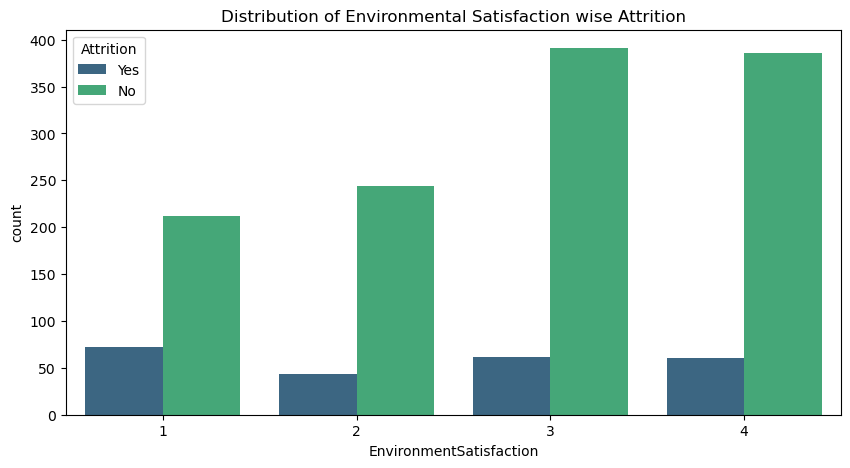

In [40]:
df10=pd.crosstab(index=df["EnvironmentSatisfaction"], columns=df["Attrition"])
print(df10)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["EnvironmentSatisfaction"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Environmental Satisfaction wise Attrition")
plt.show()

Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5


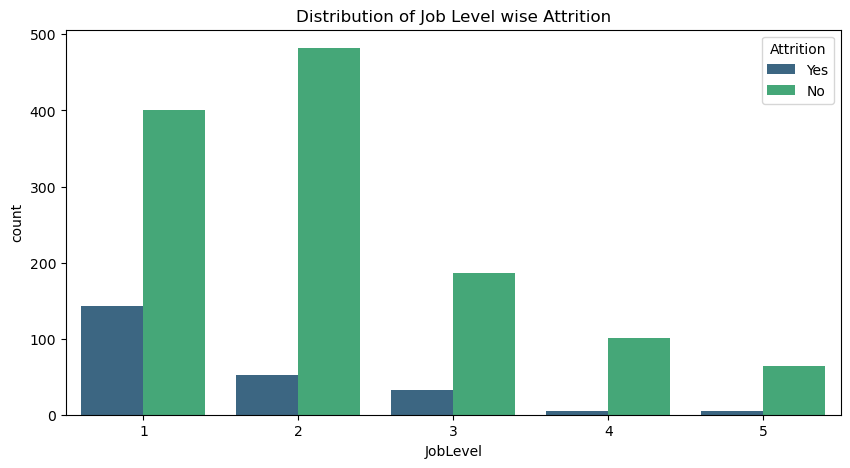

In [41]:
df11=pd.crosstab(index=df["JobLevel"], columns=df["Attrition"])
print(df11)
plt.figure(figsize=(10,5))
a=sb.countplot(x=categorical["JobLevel"],data=categorical,hue=df["Attrition"], palette='viridis')
plt.title("Distribution of Job Level wise Attrition")
plt.show()

Education          1    2    3    4   5
EducationField                         
Human Resources    2    2   16    5   2
Life Sciences     67  116  233  173  17
Marketing         14   24   59   52  10
Medical           63   99  183  104  15
Other              5   19   24   33   1
Technical Degree  19   22   57   31   3


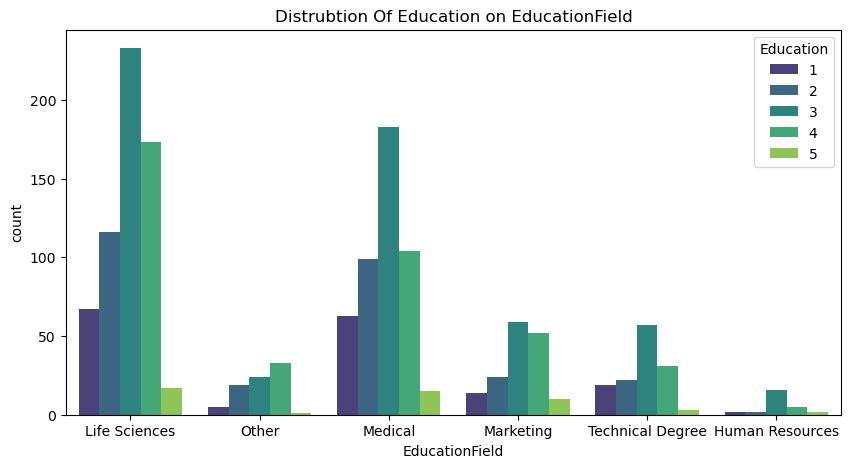

In [43]:
df12=pd.crosstab(index=df["EducationField"], columns=df["Education"])
print(df12)
plt.figure(figsize=(10,5))
sb.countplot(x=df["EducationField"],hue=df['Education'],data=df,palette='viridis')
plt.title('Distrubtion Of Education on EducationField')
plt.show()

EducationField          Human Resources  Life Sciences  Marketing  Medical  \
Department                                                                   
Human Resources                      27             16          0       13   
Research & Development                0            440          0      363   
Sales                                 0            150        159       88   

EducationField          Other  Technical Degree  
Department                                       
Human Resources             3                 4  
Research & Development     64                94  
Sales                      15                34  


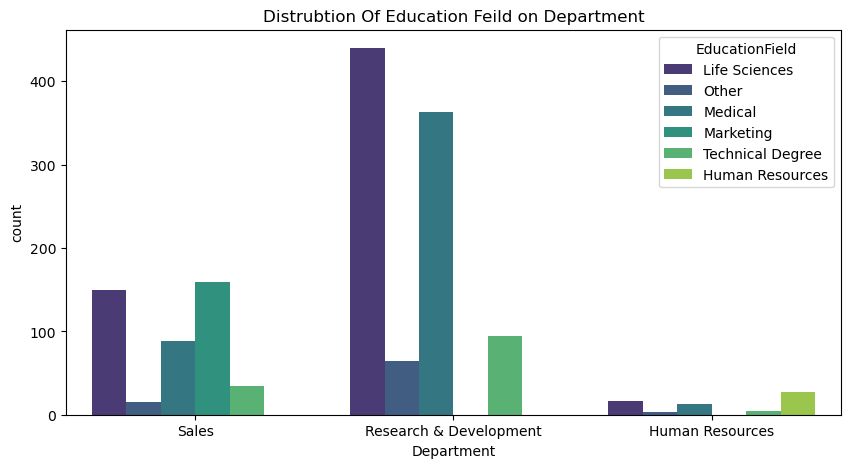

In [44]:
df13=pd.crosstab(index=df["Department"], columns=df["EducationField"])
print(df13)
plt.figure(figsize=(10,5))
sb.countplot(x=df["Department"],hue=df['EducationField'],data=df,palette='viridis')
plt.title('Distrubtion Of Education Feild on Department')
plt.show()

Attrition           No  Yes
TotalWorkingYears          
0.000000             6    5
1.000000            41   40
2.000000            22    9
3.000000            33    9
4.000000            51   12
5.000000            72   16
6.000000           103   22
7.000000            63   18
8.000000            87   16
9.000000            86   10
10.000000          177   25
11.000000           29    7
11.279592           58    5
12.000000           43    5
13.000000           33    3
14.000000           27    4
15.000000           35    5
16.000000           34    3
17.000000           30    3
18.000000           23    4
19.000000           19    3
20.000000           28    2
21.000000           33    1
22.000000           19    2
23.000000           20    2
24.000000           15    3
25.000000           13    1
26.000000           13    1
27.000000            7    0
28.000000           13    1


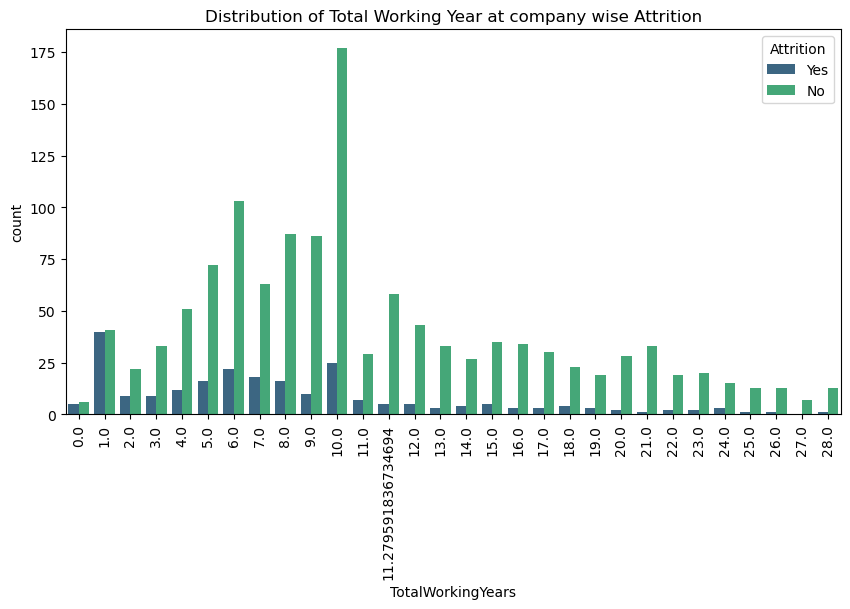

In [71]:
df14=pd.crosstab(index=df["TotalWorkingYears"], columns=df["Attrition"])
print(df14)
plt.figure(figsize=(10,5))
a=sb.countplot(x=df["TotalWorkingYears"],data=categorical,hue=df["Attrition"], palette='viridis')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title("Distribution of Total Working Year at company wise Attrition")
plt.show()

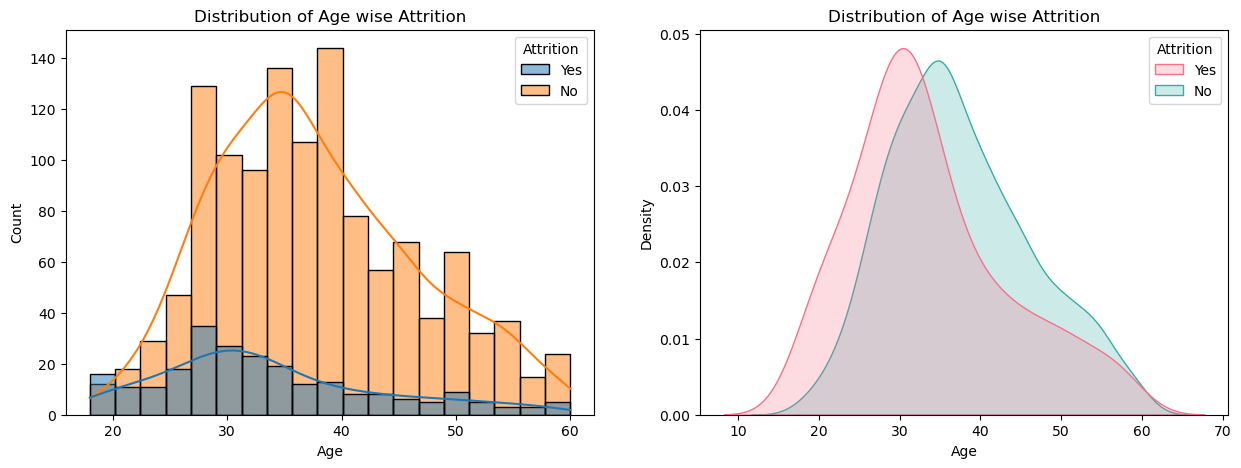

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(data=df, x='Age', hue='Attrition', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Age wise Attrition')
ax[1].set_title('Distribution of Age wise Attrition')
sb.kdeplot(data=df, x='Age', hue='Attrition', fill=True, common_norm=False, palette='husl')
plt.show()

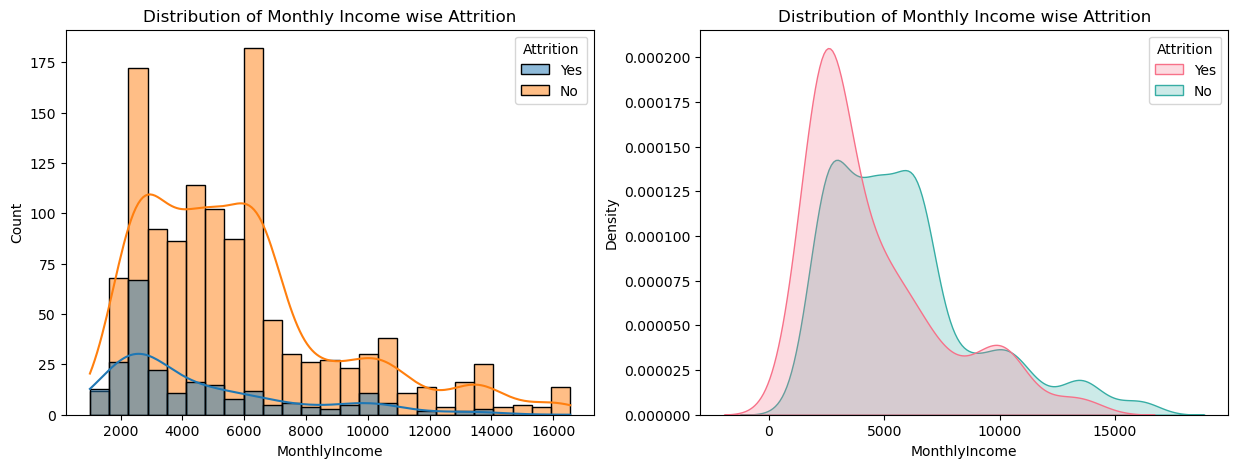

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(data=df, x=df["MonthlyIncome"], hue='Attrition', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Monthly Income wise Attrition')
ax[1].set_title('Distribution of Monthly Income wise Attrition')
sb.kdeplot(data=df, x=df["MonthlyIncome"], hue='Attrition', fill=True, common_norm=False, palette='husl')
plt.show()

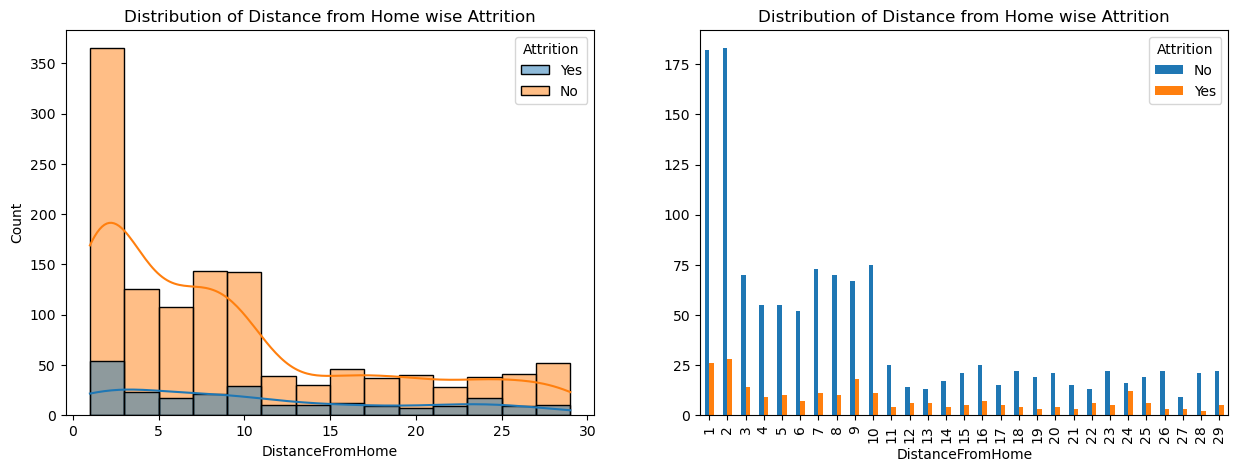

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.histplot(data=df, x=df['DistanceFromHome'], hue='Attrition', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Distance from Home wise Attrition')
ax[1].set_title('Distribution of Distance from Home wise Attrition')
df14=pd.crosstab(index=df["DistanceFromHome"], columns=df["Attrition"])
df14.plot.bar(ax=ax[1])
plt.show()

Categorical column and Numerical column Analysis

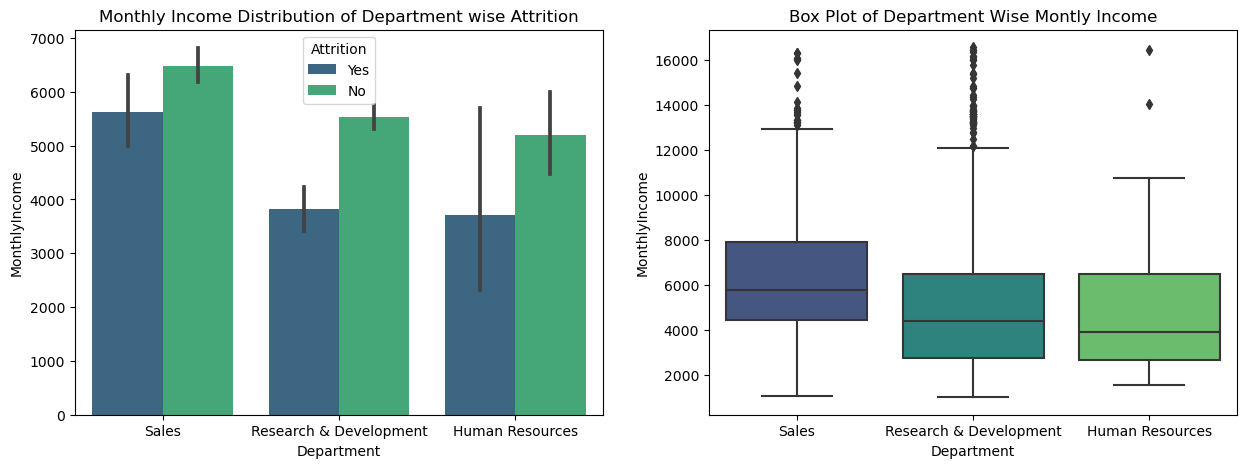

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=df["Department"], y=df["MonthlyIncome"], ax=ax[1], palette="viridis")
a=sb.barplot(x=df["Department"], y=df["MonthlyIncome"], hue=df["Attrition"], palette="viridis", ax=ax[0])
ax[0].set_title('Monthly Income Distribution of Department wise Attrition')
ax[1].set_title('Box Plot of Department Wise Montly Income')
plt.show()

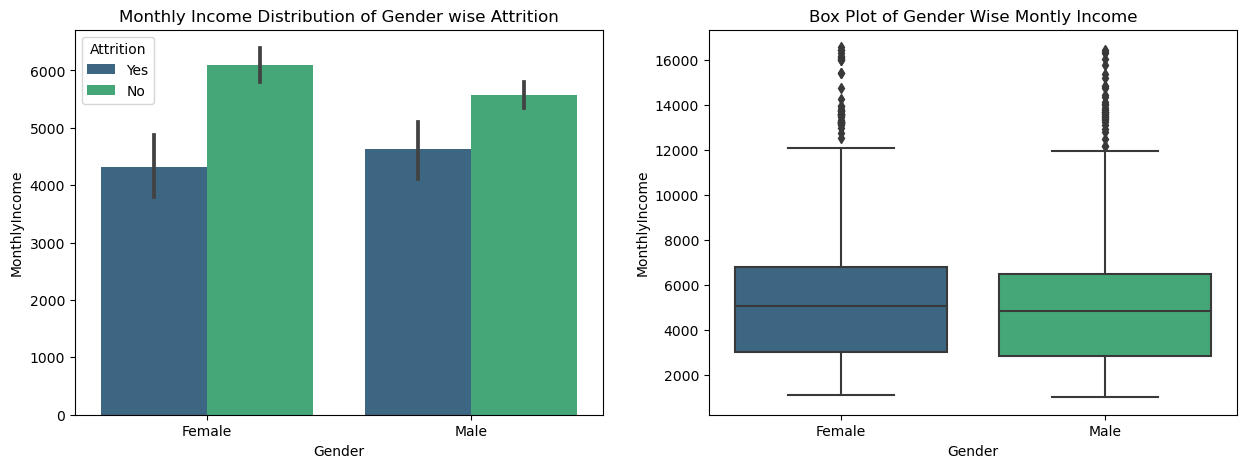

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=df["Gender"], y=df["MonthlyIncome"], ax=ax[1], palette="viridis")
a=sb.barplot(x=df["Gender"], y=df["MonthlyIncome"], hue=df["Attrition"], palette="viridis", ax=ax[0])
ax[0].set_title('Monthly Income Distribution of Gender wise Attrition')
ax[1].set_title('Box Plot of Gender Wise Montly Income')
plt.show()

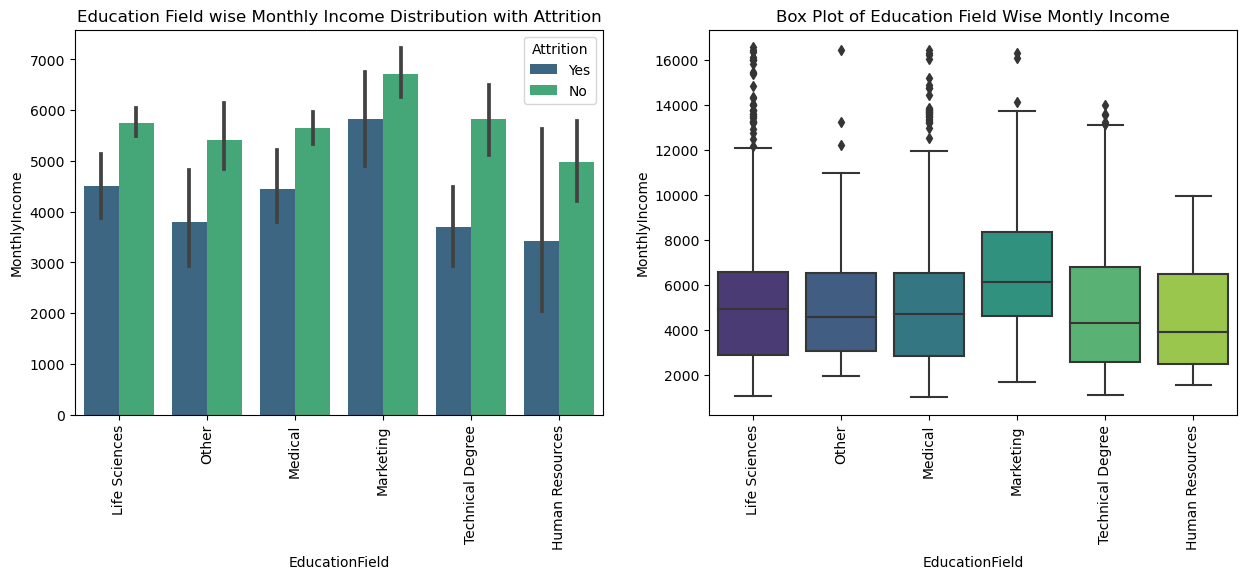

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=df["EducationField"], y=df["MonthlyIncome"], ax=ax[1], palette="viridis")
a=sb.barplot(x=df["EducationField"], y=df["MonthlyIncome"], hue=df["Attrition"], palette="viridis", ax=ax[0])
ax[0].set_title('Education Field wise Monthly Income Distribution with Attrition')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title('Box Plot of Education Field Wise Montly Income')
ax[1].set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

Numerical column and Numerical Column Analysis

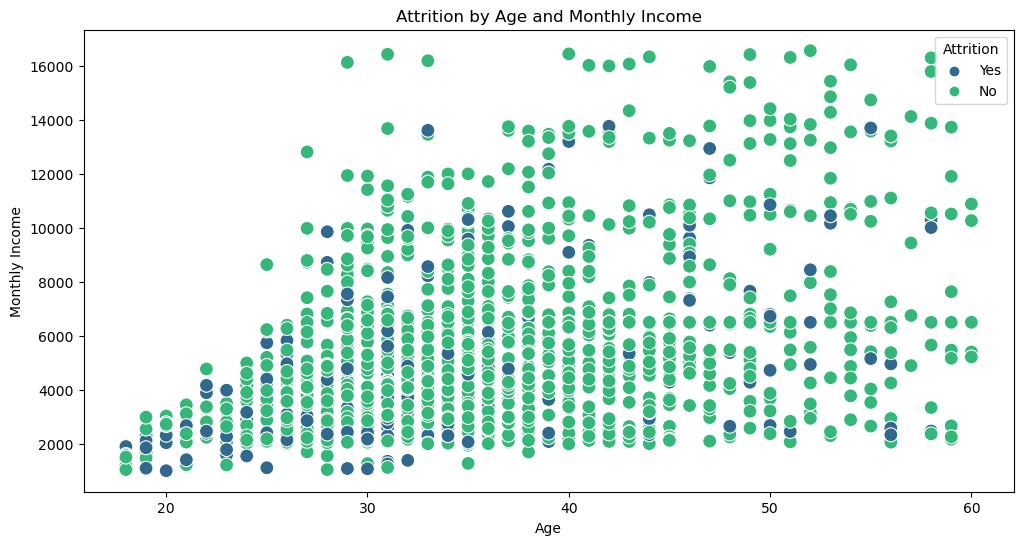

In [60]:
plt.figure(figsize=(12, 6))
sb.scatterplot(data=df, x='Age', y=df["MonthlyIncome"], hue='Attrition', palette='viridis', s=100)
plt.title('Attrition by Age and Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

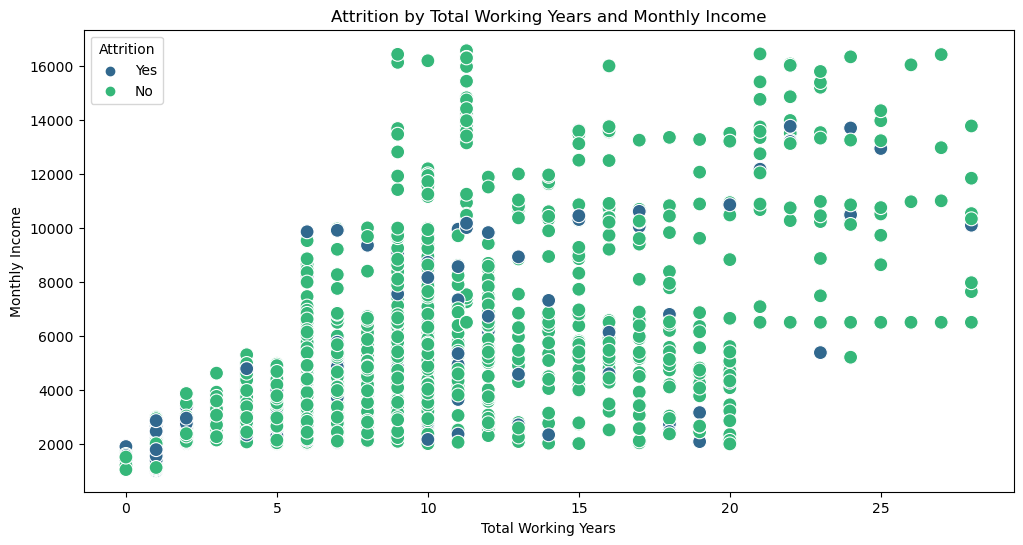

In [61]:
plt.figure(figsize=(12, 6))
sb.scatterplot(data=df, x=df["TotalWorkingYears"], y=df["MonthlyIncome"], hue='Attrition', palette='viridis', s=100)
plt.title('Attrition by Total Working Years and Monthly Income')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

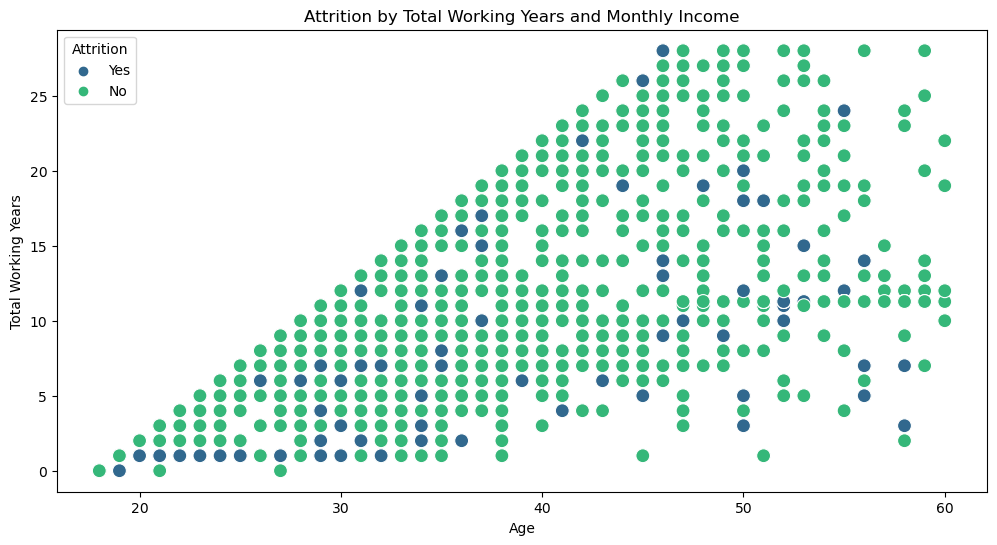

In [62]:
plt.figure(figsize=(12, 6))
sb.scatterplot(data=df, x=df["Age"], y=df["TotalWorkingYears"], hue='Attrition', palette='viridis', s=100)
plt.title('Attrition by Total Working Years and Monthly Income')
plt.xlabel('Age')
plt.ylabel('Total Working Years')
plt.show()

,Age,DailyRate,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
Age,1.000000,0.010661,-0.010145,0.024287,0.497855,0.028051,0.680381,0.311309
DailyRate,0.010661,1.000000,-0.050990,0.023381,0.007707,-0.032182,0.014515,-0.034055
EmployeeNumber,-0.010145,-0.050990,1.000000,0.035179,-0.014829,0.012648,-0.014365,-0.011240
HourlyRate,0.024287,0.023381,0.035179,1.000000,-0.015794,-0.015297,-0.002334,-0.019582
MonthlyIncome,0.497855,0.007707,-0.014829,-0.015794,1.000000,0.034814,0.772893,0.514285
MonthlyRate,0.028051,-0.032182,0.012648,-0.015297,0.034814,1.000000,0.026442,-0.023655
TotalWorkingYears,0.680381,0.014515,-0.014365,-0.002334,0.772893,0.026442,1.000000,0.628133
YearsAtCompany,0.311309,-0.034055,-0.011240,-0.019582,0.514285,-0.023655,0.628133,1.000000


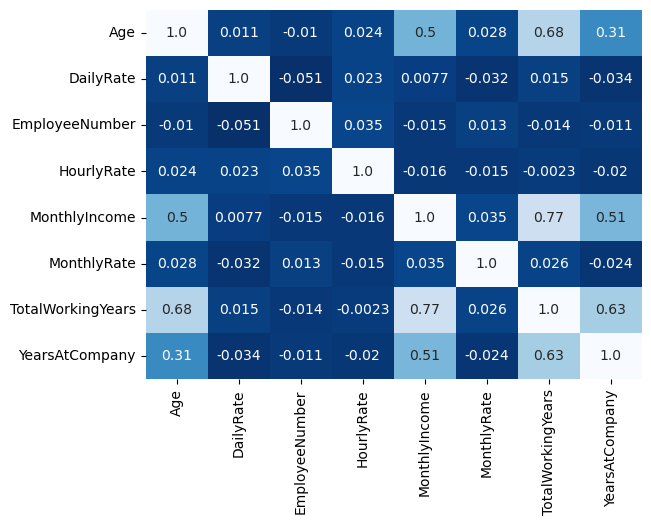

In [63]:
sb.heatmap(continous.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
continous.corr()

In [65]:
# to find the correlation matrix all the columns the all columns must be numerical one 
# to convert the categorical column to numerical column we use the labelEncoder
# The LabelEncoder is used to encode categorical (text) data into numerical labels. 
# It assigns a unique integer to each distinct category in a column.
from sklearn.preprocessing import LabelEncoder

In [66]:
data=df.copy() # we need to copy the data set so that the original dataset is not impacted 
label=LabelEncoder() # Declare the instance of label Encoder 
for i in data.select_dtypes(include='object').columns: # for loop to iterate over all the columns 
    data[i]=label.fit_transform(data[i]) #  It first fits the LabelEncoder to the unique values in the column 
    # using fit_transform(). This step assigns unique integer labels to each unique category in the column 
    # and replaces the original categorical values 
data.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8.0,0,1,6.0,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10.0,3,3,10.0,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7.0,3,3,0.0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8.0,3,3,8.0,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6.0,3,3,2.0,2,2,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.573954,-0.019621,-0.021490,0.164237,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.183018,-0.059478,-0.063939,-0.172690,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.028653,0.015240,-0.011256,-0.021994,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.028767,0.002453,-0.037848,-0.002614,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.001115,0.036875,0.026383,0.050221,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.016672,-0.036942,-0.026556,0.013052,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.118662,-0.025100,0.009819,0.078337,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.012076,0.049195,0.041191,-0.012174,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.009576,0.023603,0.010309,0.020187,-0.008416,-0.009019,-0.009197


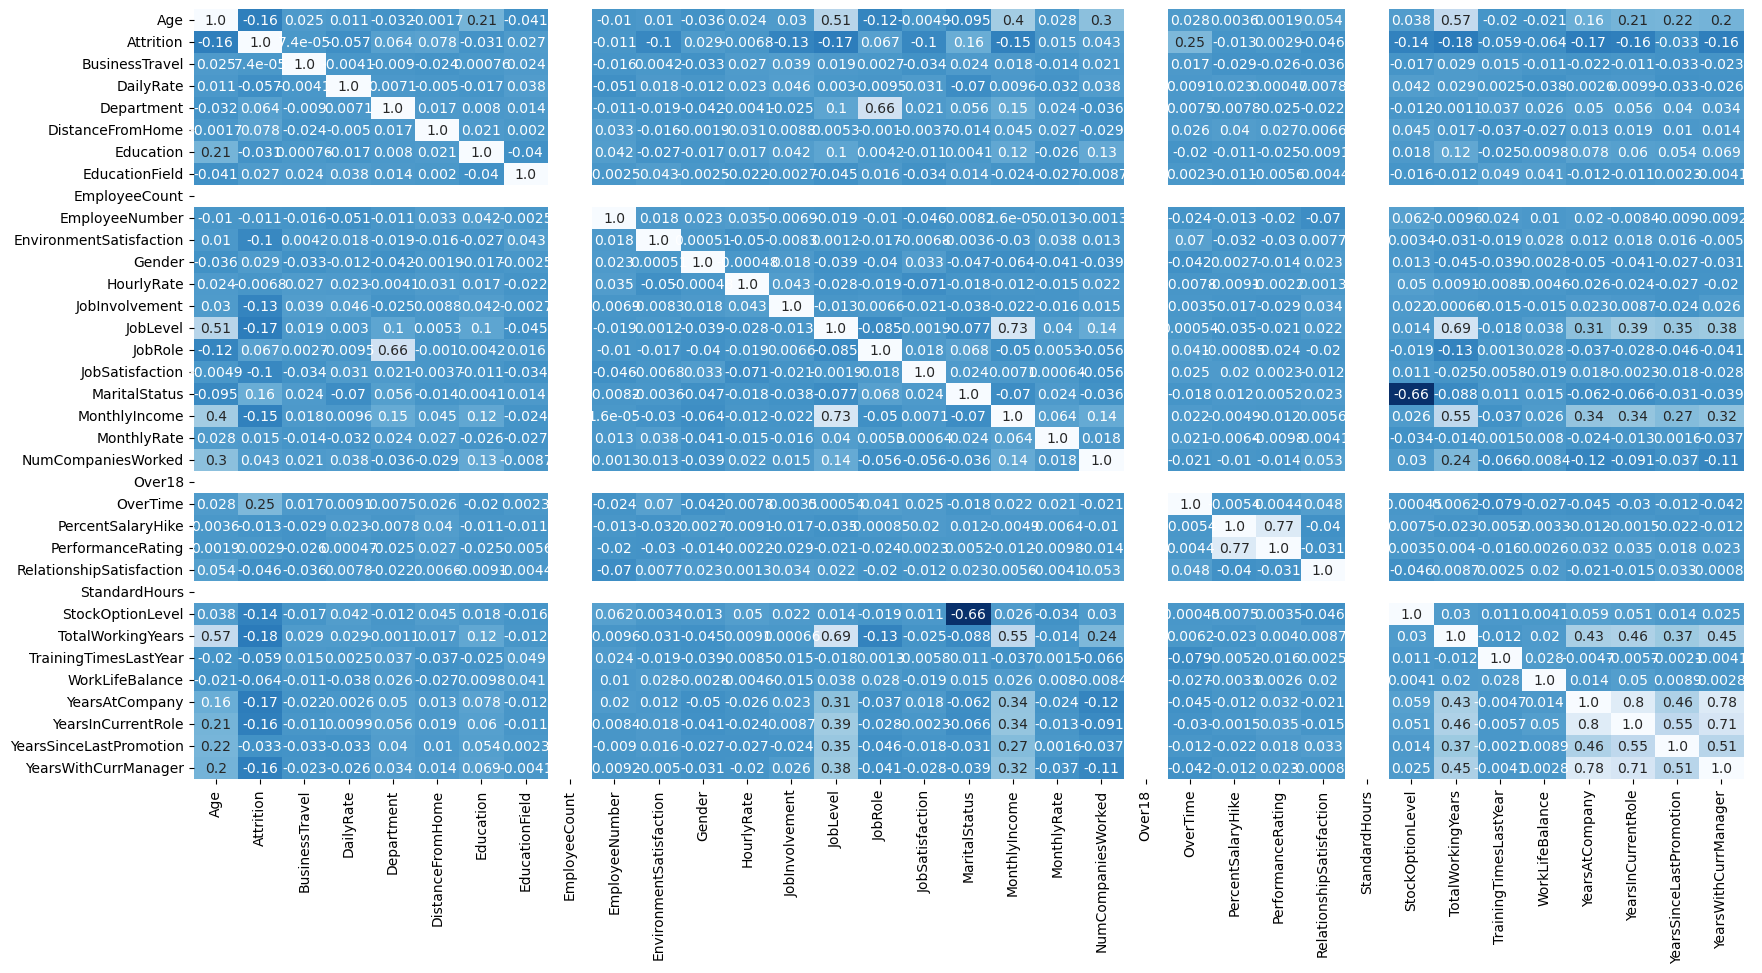

In [67]:
plt.figure(figsize=(20,10))
sb.heatmap(data.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
data.corr()

# A Company IAM Technology wants to analyze the Employee Attrition Data. Also want to know why the employees Quit the Organization. 
Overview of Dataset:
It comprises various attributes such as age, gender, job role, department, salary, education, job satisfaction, and more.
The analysis reveals the overall attrition rate within the organization, which is a crucial metric for HR and management.
Demographic analysis, including age and gender, provides insights into the composition of the workforce.
Understanding the distribution of employees across different age groups and genders can help identify potential areas of focus.
Conclusion:
1. 16.22% (237) of Employee attrited from the organisation on which 87 are female and 150 are male employees.
2. As per the analysis, Research & Development Department have most attrited employees which is 133.
3. 25-30 year of Age group Employees have high attrition rate.
4. High attrition rates in specific roles that is Sales Executive and Laboratory Technician may indicate areas that require attention. 
5. As per the Analysis 47% of attrited employees have low job satisfaction. 
6. High Attrition Rate among the employees with short tenure. 40 employees with 1 Years in the complany have left the company.
7. High attrition rates among low-salary employees. 
8. Employees related to Life Science and Medical education field have high attrition. 
Recommendations:
1. Revised Salary Structure
2. Improve Job Satisfaction 
3. Offer the target training program.